In [1]:
import os 
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import cv2
import glob
import matplotlib.pyplot as plt

/Users/chungricky/anaconda/envs/tensor_keras/lib/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)
Using TensorFlow backend.


# Read Image List

In [2]:
images = [cv2.resize(cv2.imread(file,cv2.IMREAD_GRAYSCALE)/255, (224, 224)).astype('float32')  for file in glob.glob("Train/*")]
images_label = [float(file.split("/")[1].split("_")[0])-1 for file in glob.glob("Train/*")]

<IPython.core.display.Javascript object>


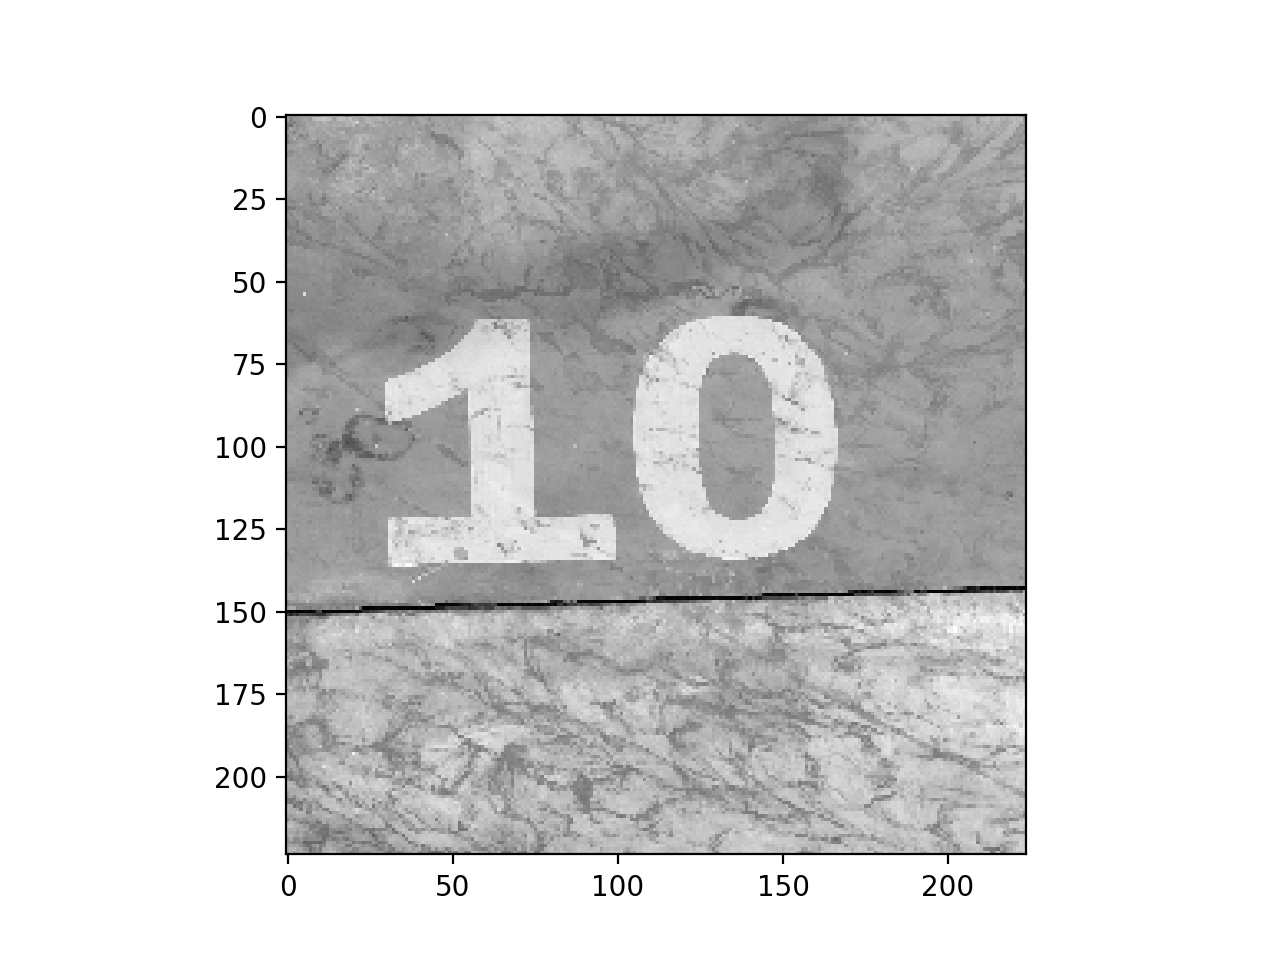

In [16]:
%matplotlib notebook
plt.imshow(images[0], cmap="gray")
plt.show()

# Trainning

In [14]:
batch_size = 128
num_classes = 14
epochs = 1000

# input image dimensions
img_rows, img_cols = 224, 224

x_train = np.array(images)
y_train = np.array(images_label)

# the data, split between train and test sets
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
#     x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
#     x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)



print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,)
# score = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

x_train shape: (47, 224, 224, 1)
47 train samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 222, 222, 32)      320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 774400)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               99123328  
_________________________________________________________________
dropout_10 (Dropout)      

5


5


In [44]:
model.save_weights("AmasModel.h5")

# Test

In [5]:
import random 
num_classes = 14
# input image dimensions
img_rows, img_cols = 224, 224
if K.image_data_format() == 'channels_first':
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)


In [6]:
# build model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.load_weights("AmasModel.h5")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 774400)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               99123328  
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

truth: 3


<IPython.core.display.Javascript object>


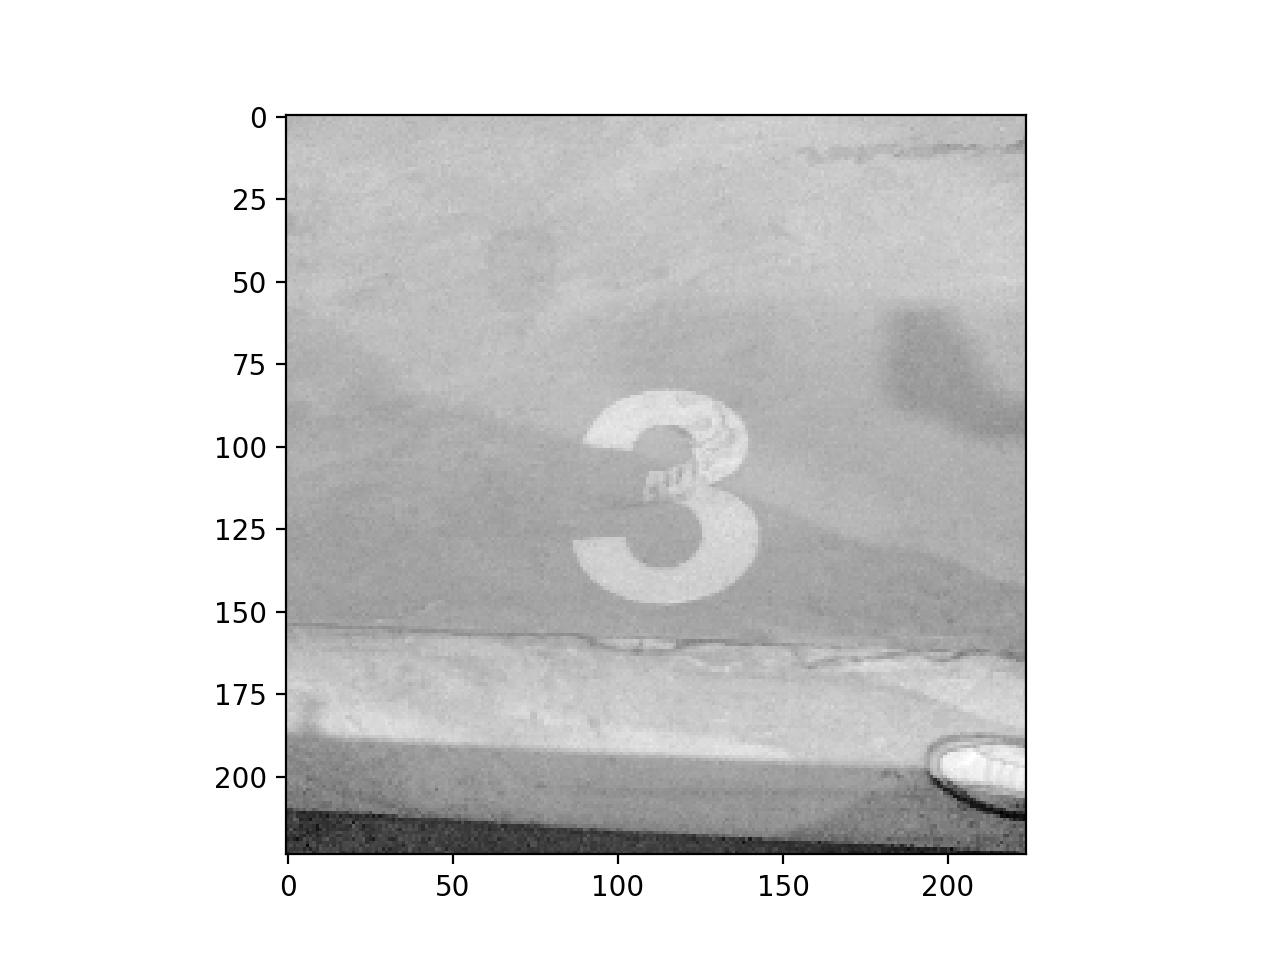

prob: [[6.9840043e-15 3.2659005e-13 9.9999988e-01 7.9346492e-08 5.6969043e-12
  6.6184733e-17 2.3085673e-09 8.5882620e-11 7.1587826e-11 1.5042768e-14
  1.5777847e-12 1.4196113e-16 2.1405679e-13 4.8313256e-11]]
pred: 3


In [51]:
#random choose image
num = random.randint(0,46)
img = images[num]
lab = images_label[num]
print("truth: {}".format(int(lab+1)))
%matplotlib notebook
plt.imshow(img, cmap="gray")
plt.show()

n_img = np.expand_dims(img,axis=0)
n_img = np.expand_dims(n_img,axis=-1)
prob = model.predict(n_img)
print("prob: {}".format(prob))
pred = np.argmax(prob) +1
print("pred: {}".format(int(pred)))